In [ ]:
!pip install statsbombpy
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install mplsoccer
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
import matplotlib.patheffects as path_effects
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
import math as math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 4.4 MB/s 
     |████████████████████████████████| 152 kB 67.8 MB/s 
     |████████████████████████████████| 127 kB 59.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 6.2 MB/s 


Functions


In [ ]:
def split_location(dataframe):

  location_x = []
  location_y = []

  for i in range(len(dataframe)):

    location_x.append(dataframe[i][0])
    location_y.append(dataframe[i][1])

  return location_x,location_y


In [ ]:
def conversion_rate(total_shots,total_goals):

  conversion_rate = []

  for i in range(len(total_shots.values)):

    conversion = total_goals.values[i]/total_shots.values[i]
    conversion_rate.append(conversion)

  
  df_conversion = pd.DataFrame(index = total_shots.index)
  df_conversion['Converion Rate'] = conversion_rate
  

  return df_conversion

In [ ]:
df_events = pd.DataFrame()
df_events = sb.competition_events(country="England",
            division="FA Women's Super League", 
            season="2019/2020",
            gender="female", split=True)

In [ ]:
df_pressures = df_events['pressures']
mask_pressures_chelsea = df_pressures[df_pressures['team'] == 'Chelsea FCW']
mask_pressures_chelsea

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,position,location,duration,related_events,match_id,possession_team_id,player_id,counterpress,under_pressure,off_camera
1367,8d1c3828-0af2-4101-a1ee-1b5e81f86043,14,1,00:00:09.685,0,9,Pressure,2,Aston Villa,From Kick Off,...,Center Forward,"[73.4, 20.0]",0.503858,"[1960a1b0-9a0b-40ec-bb4d-8e74f8f99e1a, c294402...",3775581,2647,4961,NaN,NaN,NaN
1368,2276f255-9b85-4c6d-9d05-46ba09767412,16,1,00:00:11.050,0,11,Pressure,2,Aston Villa,From Kick Off,...,Left Wing,"[68.2, 14.4]",0.495659,"[29cc05a7-a43f-414b-a8b6-275a5e60240d, 87af389...",3775581,2647,10514,NaN,NaN,NaN
1369,7da92923-0f88-4f52-841d-797e12c7ce5b,20,1,00:00:12.220,0,12,Pressure,2,Aston Villa,From Kick Off,...,Center Defensive Midfield,"[74.2, 27.0]",0.693692,"[2b076a43-21ef-41f6-b3bc-db273b17c416, 8b68e74...",3775581,2647,4641,NaN,NaN,NaN
1370,1617c308-a678-4b36-832b-d86968f26a64,32,1,00:00:20.925,0,20,Pressure,2,Aston Villa,From Kick Off,...,Center Attacking Midfield,"[92.5, 58.5]",0.940643,"[8878262b-45bd-4912-bf56-ed06e3c22906, e7ba07c...",3775581,2647,4641,NaN,NaN,NaN
1371,b41ea14b-2bb8-4f4a-8e50-de47733da319,87,1,00:01:32.381,1,32,Pressure,4,Chelsea FCW,Regular Play,...,Left Wing,"[97.9, 4.2]",1.935858,"[552fa5fb-75f2-47b4-b95a-d232a1db9c9c, f948b2c...",3775581,971,10514,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42046,430b4e71-f9d8-4ed4-b22a-48a6afa5f072,3525,2,00:43:56.083,88,56,Pressure,180,Chelsea FCW,From Throw In,...,Right Center Forward,"[66.4, 63.1]",0.193011,NaN,3775652,971,10108,True,NaN,NaN
42049,ace1b6ec-32db-466c-8f22-9af5d230ed99,3584,2,00:47:47.106,92,47,Pressure,185,Chelsea FCW,From Free Kick,...,Right Center Back,"[92.4, 49.5]",0.923380,NaN,3775652,971,15549,NaN,NaN,NaN
42050,39b4ad2e-641a-461b-8c71-bafd4c3af238,3619,2,00:48:23.824,93,23,Pressure,186,Chelsea FCW,From Throw In,...,Left Center Back,"[116.6, 38.7]",0.587229,NaN,3775652,971,4633,NaN,NaN,NaN
42052,27bb5cf7-f80c-4294-8a56-3fb0cd11a5c9,3673,2,00:49:45.909,94,45,Pressure,190,Chelsea FCW,From Throw In,...,Right Center Forward,"[112.4, 45.9]",0.843986,[2bcc32a1-ea4c-48fe-947c-97dde69aaccc],3775652,971,10108,NaN,NaN,NaN


In [ ]:
mask_pressures_chelsea_loc = mask_pressures_chelsea['location']
mask_pressures_chelsea_reset = mask_pressures_chelsea_loc.reset_index(drop=True)

In [ ]:
chelsea_press_x, chelsea_press_y = split_location(mask_pressures_chelsea_reset)

In [ ]:
mask_pressures_chelsea.insert(1,'location_x',chelsea_press_x)
mask_pressures_chelsea.insert(1,'location_y',chelsea_press_y)

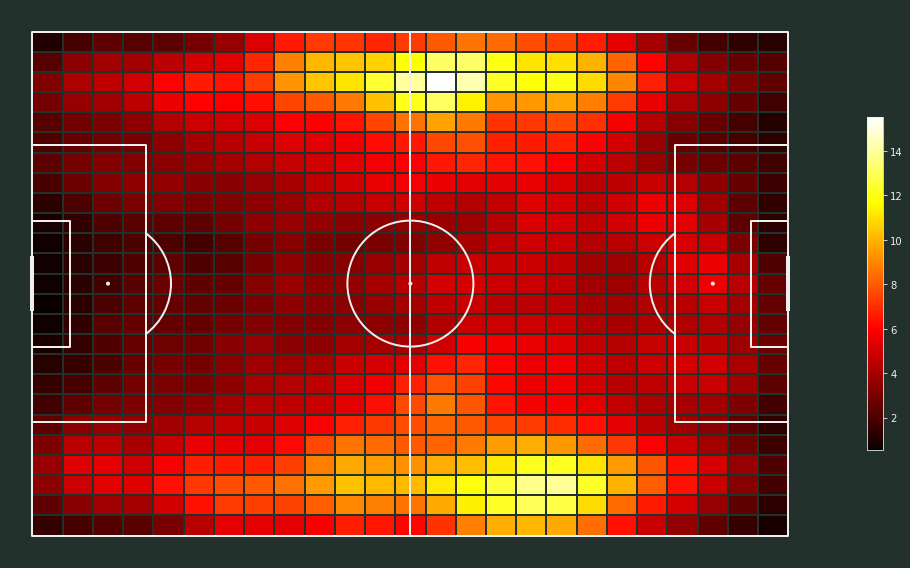

In [ ]:
# setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(15, 8))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(mask_pressures_chelsea['location_x'], mask_pressures_chelsea['location_y'], statistic='count', bins=(25,25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

Create passes dataframe to plot passes of player

In [ ]:
df_event_pass = pd.DataFrame(df_events['passes'])
df_event_pass.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,pass_deflected,pass_straight,pass_technique,pass_inswinging,pass_no_touch,pass_miscommunication,pass_through_ball,pass_outswinging,pass_goal_assist,out
0,d062f895-1e3c-4fff-9937-fa3c81408bf7,5,1,00:00:00.340,0,0,Pass,2,Arsenal WFC,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,edd39d4f-cbcf-428d-a6f6-80914c176414,8,1,00:00:00.692,0,0,Pass,2,Arsenal WFC,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,dac600a7-e892-4dd2-a0f6-f06547c7d4d9,11,1,00:00:02.638,0,2,Pass,2,Arsenal WFC,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,050fab04-eb9a-49b2-b80f-eb3de4fbabeb,14,1,00:00:05.271,0,5,Pass,2,Arsenal WFC,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4088f2ce-0447-42b3-aaa3-287ea6dcfec0,18,1,00:00:08.255,0,8,Pass,2,Arsenal WFC,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Passes for Frans

In [ ]:
df_pass_player = df_event_pass[df_event_pass['player_id'] == 4641]
df_passes_frans = pd.DataFrame(df_pass_player[df_pass_player['pass_outcome'] != 'NaN'])


Pass end location and location of player are stored as one value. split into array then insert into dataframe for new x and y

In [ ]:
df_passes_location = df_passes_frans['pass_end_location']

df_passes_reset = df_passes_location.reset_index(drop=True)

In [ ]:
pass_end_location_x, pass_end_location_y = split_location(df_passes_reset)

In [ ]:
df_passes_frans.insert(1,'pass_end_location_x',pass_end_location_x)
df_passes_frans.insert(1,'pass_end_location_y',pass_end_location_y)

In [ ]:

passes_location = df_passes_frans['location']
passes_reset = passes_location.reset_index(drop=True)


In [ ]:
location_x,location_y = split_location(passes_reset)

In [ ]:
df_passes_frans.insert(1,'location_x',location_x)
df_passes_frans.insert(1,'location_y',location_y)

Get the passes into the box for frans

In [ ]:
passes = df_passes_frans[(df_passes_frans['pass_end_location_x'] >= 102) & (df_passes_frans['pass_end_location_y'] <= 62) &  (df_passes_frans['pass_end_location_y']>=18)] 
passes

,id,location_y,location_x,pass_end_location_y,pass_end_location_x,index,period,timestamp,minute,second,...,pass_deflected,pass_straight,pass_technique,pass_inswinging,pass_no_touch,pass_miscommunication,pass_through_ball,pass_outswinging,pass_goal_assist,out
3972,85414d57-15d7-4015-868a-e2c403f90386,20.0,111.1,23.8,112.9,455,1,00:10:40.124,10,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3990,8561fc36-cb04-44a0-b805-33e8ff0a6c2f,27.4,100.7,21.9,106.8,523,1,00:11:27.029,11,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4096,2b08a1dc-47ac-4bb9-a650-50d5b7f5e990,20.5,89.0,43.6,111.1,893,1,00:23:31.688,23,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
4220,34e5a1af-cc0c-4fc0-b242-deb6d79f819d,45.2,93.0,49.5,115.4,1315,1,00:35:13.021,35,13,...,NaN,NaN,Through Ball,NaN,NaN,NaN,True,NaN,NaN,NaN
4339,e3aeba08-1824-4953-9cc6-1addf5453e9a,56.9,98.6,56.6,103.2,1780,2,00:00:15.806,45,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120077,6d3ecbb1-442f-4830-af34-12067d5ce29b,22.8,90.8,19.9,105.8,2264,2,00:11:38.671,56,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120343,d0468c77-3a90-4a03-8958-33e0b5471a48,8.0,107.2,18.7,105.5,3250,2,00:38:10.507,83,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120364,278d801c-4eec-4c30-bff7-7c77d4849583,26.4,109.1,33.7,108.9,3336,2,00:39:14.958,84,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120419,ec3b01a8-1ebc-4a7e-8e6c-d84256fd6edf,12.2,98.1,26.4,105.1,3541,2,00:44:58.627,89,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Frans Kirby Passes into the box, Super League 2021-2022

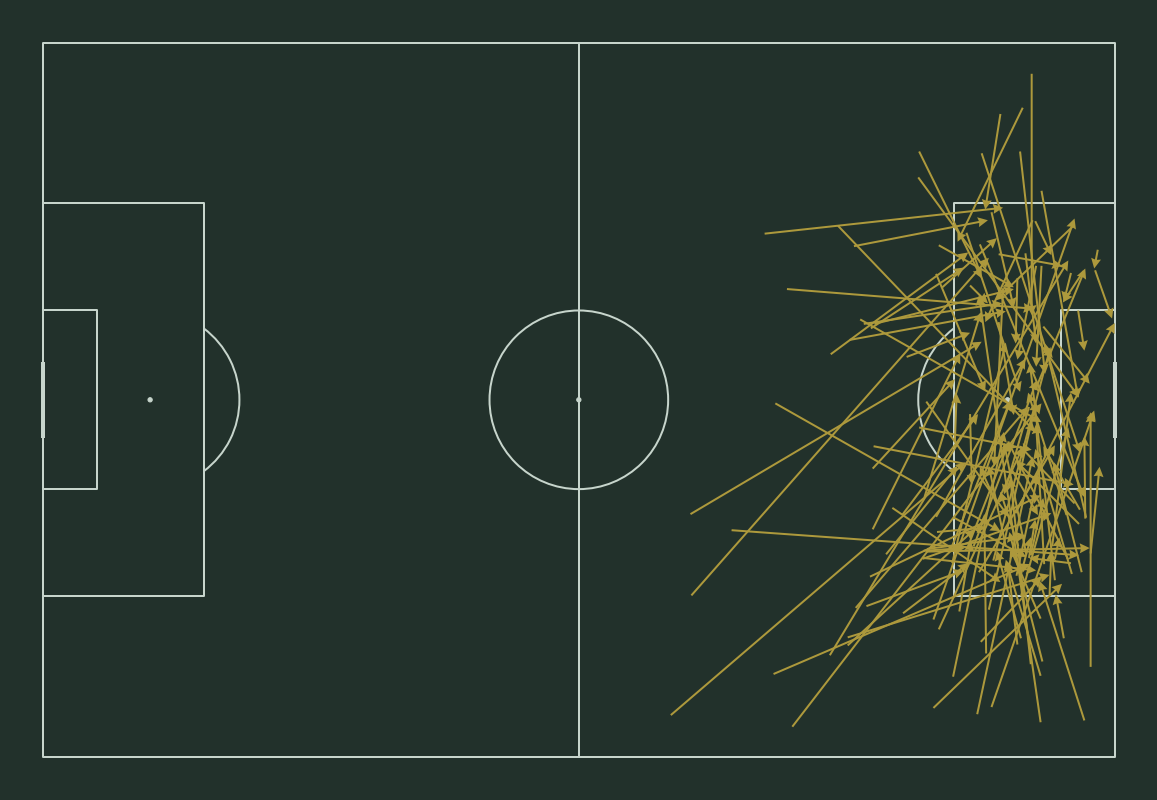

In [ ]:
# Set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.arrows(passes['location_x'], passes['location_y'],passes['pass_end_location_x'], passes['pass_end_location_y'], width=2,headwidth=5, headlength=5, color='#ad993c', ax=ax, label='completed passes frans')


In [ ]:
df_event_shots = pd.DataFrame(df_events['shots'])
df_event_shots

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,shot_aerial_won,shot_one_on_one,shot_open_goal,out,shot_deflected,shot_saved_off_target,shot_redirect,off_camera,shot_follows_dribble,shot_saved_to_post
0,9076cf40-9179-432a-9663-94cbbff6ce74,92,1,00:01:27.151,1,27,Shot,5,Aston Villa,From Keeper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b3a321bb-597c-49da-b039-21cf7eeb6095,278,1,00:05:21.756,5,21,Shot,11,Arsenal WFC,From Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87d44b8c-955b-4341-a3c3-c6665fdb37bd,338,1,00:06:57.808,6,57,Shot,14,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ac4a3cfb-cad7-4ebf-8fb1-3e97075fd13e,460,1,00:10:06.492,10,6,Shot,20,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,512cd927-1ddf-4921-9d2b-38658736aefe,609,1,00:14:50.232,14,50,Shot,27,Arsenal WFC,From Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,83b225e0-9232-43ba-ba7c-5222eaf7fe81,2548,2,00:26:40.112,71,40,Shot,137,Arsenal WFC,From Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3244,c46bcd47-083e-426c-9776-bfd662fb4e8b,2795,2,00:35:52.453,80,52,Shot,155,West Ham United LFC,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3245,4604ac2a-2ccf-4f21-a312-51f45d9ef16a,2853,2,00:38:14.196,83,14,Shot,161,Arsenal WFC,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3246,8c9133e2-5d6e-463b-906a-155482a55b7e,2913,2,00:40:06.591,85,6,Shot,166,Arsenal WFC,Regular Play,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_event_shots_chelsea = df_event_shots[df_event_shots['team'] == 'Chelsea FCW']
mask_shots_chelsea = df_event_shots_chelsea['location']
shots_reset = mask_shots_chelsea.reset_index(drop=True)

In [ ]:
shot_location_x,shot_location_y = split_location(shots_reset)

In [ ]:
df_event_shots_chelsea.insert(1,'location_x',shot_location_x)
df_event_shots_chelsea.insert(1,'location_y',shot_location_y)

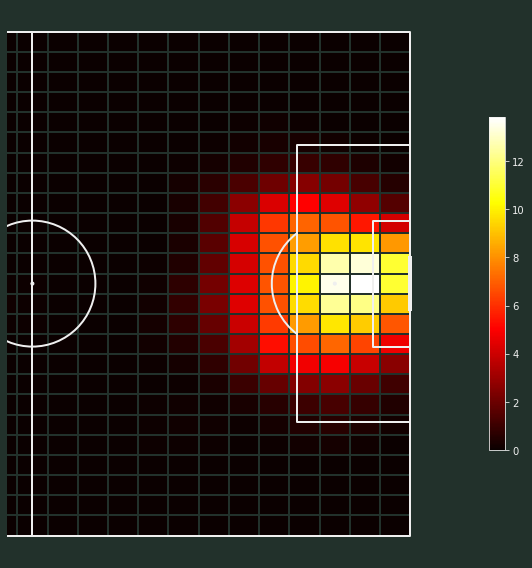

In [ ]:
# setup pitch
shots_pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef', half=True)
# draw
fig, ax = shots_pitch.draw(figsize=(15, 8))
fig.set_facecolor('#22312b')
bin_statistic = shots_pitch.bin_statistic(df_event_shots_chelsea['location_x'], df_event_shots_chelsea['location_y'], statistic='count', bins=(25,25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = shots_pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

XG model

In [ ]:
df_event_goals = pd.DataFrame(df_events['shots'])
df_event_goals.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,shot_aerial_won,shot_one_on_one,shot_open_goal,out,shot_deflected,shot_saved_off_target,shot_redirect,off_camera,shot_follows_dribble,shot_saved_to_post
0,9076cf40-9179-432a-9663-94cbbff6ce74,92,1,00:01:27.151,1,27,Shot,5,Aston Villa,From Keeper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b3a321bb-597c-49da-b039-21cf7eeb6095,278,1,00:05:21.756,5,21,Shot,11,Arsenal WFC,From Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87d44b8c-955b-4341-a3c3-c6665fdb37bd,338,1,00:06:57.808,6,57,Shot,14,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ac4a3cfb-cad7-4ebf-8fb1-3e97075fd13e,460,1,00:10:06.492,10,6,Shot,20,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,512cd927-1ddf-4921-9d2b-38658736aefe,609,1,00:14:50.232,14,50,Shot,27,Arsenal WFC,From Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_events_goals_ = df_event_goals[df_event_goals.shot_outcome == 'Goal']
df_events_goals_teams = df_events_goals_.groupby('team').count()
df_events_goals_teams.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,shot_aerial_won,shot_one_on_one,shot_open_goal,out,shot_deflected,shot_saved_off_target,shot_redirect,off_camera,shot_follows_dribble,shot_saved_to_post
team,,,,,,,,,,,,,,,,,,,,,
Arsenal WFC,62,62,62,62,62,62,62,62,62,62,...,2,6,9,0,3,0,0,0,0,0
Aston Villa,14,14,14,14,14,14,14,14,14,14,...,0,1,1,0,0,0,0,0,0,0
Birmingham City WFC,14,14,14,14,14,14,14,14,14,14,...,1,0,0,0,1,0,0,0,0,0
Brighton & Hove Albion WFC,20,20,20,20,20,20,20,20,20,20,...,3,2,0,0,2,0,0,1,1,0
Bristol City WFC,17,17,17,17,17,17,17,17,17,17,...,1,1,1,0,0,0,0,0,0,0


In [ ]:
def conversion_rate(total_shots,total_goals):

  conversion_rate = []

  for i in range(len(total_shots.values)):

    conversion = total_goals.values[i]/total_shots.values[i]
    conversion_rate.append(conversion)

  
  df_conversion = pd.DataFrame(index = total_shots.index)
  df_conversion['Converion Rate'] = conversion_rate
  

  return df_conversion

In [ ]:
conversions_per_team = conversion_rate(df_event_shots_team,df_goals_per_team)
conversions_per_team

NameError: ignored

Plots of goals per team and shots per team

Shots per team

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,3.2,3.2])
ax.barh(df_event_shots_team.index, df_event_shots_team.values)

Goals per team

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.barh(df_goals_per_team.index, df_goals_per_team.values)
plt.show()

Conversion Rates

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])

convs_per_team = conversions_per_team.values.flatten()
convs_per_team

ax.barh(conversions_per_team.index,convs_per_team)
plt.show()